#                                                             Machine Learning with Python 

## In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# setting the random seed for similar results on each run
np.random.seed(10)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-26 02:33:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2020-11-26 02:33:32 (268 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

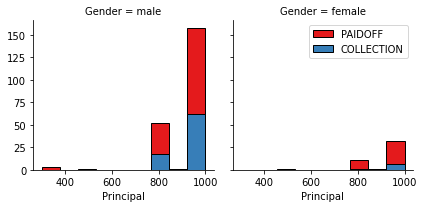

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

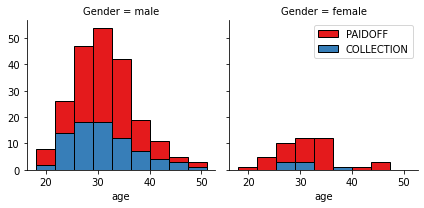

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

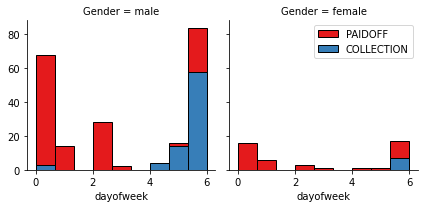

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### Education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Using one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [18]:
X_Train = Feature
X_Train[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Define Target

In [19]:
Y_Train = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
Y_Train[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data 

In [20]:
X_Train = preprocessing.StandardScaler().fit(X_Train).transform(X_Train)
X_Train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [21]:
X_Train.shape, Y_Train.shape

((346, 8), (346,))

In [22]:
# A dictionary for keeping all scores of the classifiers
TrainScores={}

In [23]:
# import scoring methods
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

# Classification 

Using training set to build an accurate model. Then using the test set to report the accuracy of the model
Using the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

BestScore = 0.0
List = []

for k in range(1,11):
    
    classify_knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(classify_knn, X_Train, Y_Train, cv=10)
    Score = scores.mean()
    List.append(Score)
    
    if Score > BestScore:
        BestScore = Score
        best_classify = classify_knn
        bestK = k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",BestScore)
classify_knn = best_classify

Best K is : 7 | Cross validation Accuracy : 0.7438655462184873


In [25]:
classify_knn

KNeighborsClassifier(n_neighbors=7)

In [26]:
classify_knn.fit(X_Train, Y_Train)
Y_pred = classify_knn.predict(X_Train)

In [27]:
jT1 = TrainScores['KNN-jaccard'] = jaccard_score(Y_Train, Y_pred, pos_label=0)
fT1 = TrainScores['KNN-f1-score'] = f1_score(Y_Train, Y_pred, average='weighted')

In [28]:
TrainScores

{'KNN-jaccard': 0.7850162866449512, 'KNN-f1-score': 0.7955764876306204}

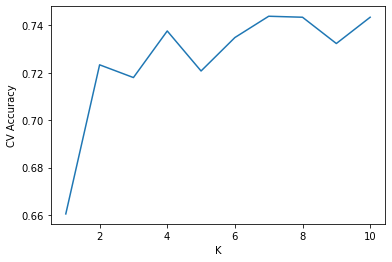

In [29]:
plt.plot(range(1,11),List)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

# Decision Tree

In [30]:
from sklearn import tree

classify_tree = tree.DecisionTreeClassifier()
classify_tree = classify_tree.fit(X_Train, Y_Train)

Y_pred = classify_tree.predict(X_Train)

In [31]:
jT2 = TrainScores['Tree-jaccard'] = jaccard_score(Y_Train, Y_pred, pos_label=0)
fT2 = TrainScores['Tree-f1-score'] = f1_score(Y_Train, Y_pred, average='weighted')

In [32]:
TrainScores

{'KNN-jaccard': 0.7850162866449512,
 'KNN-f1-score': 0.7955764876306204,
 'Tree-jaccard': 0.8724137931034482,
 'Tree-f1-score': 0.8870748695908691}

## Visualizing the tree

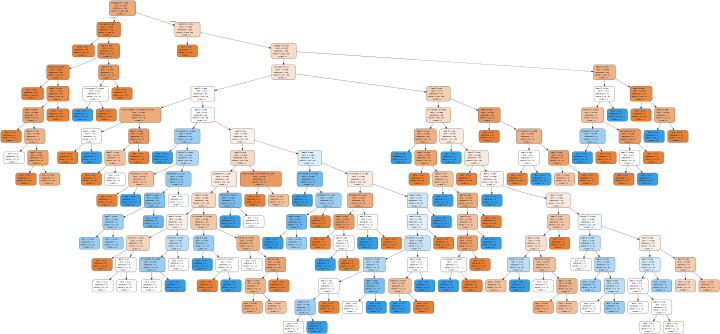

In [33]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(classify_tree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                   ],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,50!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

# Support Vector Machine

In [34]:
from sklearn import svm

classify_svm = svm.LinearSVC(random_state=10)
classify_svm.fit(X_Train, Y_Train)  

Y_pred = classify_svm.predict(X_Train)

In [35]:
jT3 = TrainScores['SVM-jaccard'] = jaccard_score(Y_Train, Y_pred, pos_label=0)
fT3 = TrainScores['SVM-f1-score'] = f1_score(Y_Train, Y_pred, average='weighted')

In [36]:
TrainScores

{'KNN-jaccard': 0.7850162866449512,
 'KNN-f1-score': 0.7955764876306204,
 'Tree-jaccard': 0.8724137931034482,
 'Tree-f1-score': 0.8870748695908691,
 'SVM-jaccard': 0.7391304347826086,
 'SVM-f1-score': 0.6441316913797436}

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

classify_log = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
classify_log = classify_log.fit(X_Train, Y_Train)

Y_pred = classify_log.predict(X_Train)
Y_probab = classify_log.predict_proba(X_Train)

In [38]:
jT4 = TrainScores['LogReg-jaccard'] = jaccard_score(Y_Train, Y_pred, pos_label=0)
fT4 = TrainScores['LogReg-f1-score'] = f1_score(Y_Train, Y_pred,average='weighted')  
lT4 = TrainScores['LogReg-logLoss'] = log_loss(Y_Train, Y_probab)

In [39]:
TrainScores

{'KNN-jaccard': 0.7850162866449512,
 'KNN-f1-score': 0.7955764876306204,
 'Tree-jaccard': 0.8724137931034482,
 'Tree-f1-score': 0.8870748695908691,
 'SVM-jaccard': 0.7391304347826086,
 'SVM-f1-score': 0.6441316913797436,
 'LogReg-jaccard': 0.7447447447447447,
 'LogReg-f1-score': 0.6997291283105058,
 'LogReg-logLoss': 0.43320342487163493}

# Model Evaluation using Test set

First, download and load the test set:

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-11-26 02:33:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-26 02:33:43 (77.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [41]:
test_df = pd.read_csv('loan_test.csv')
test_df.shape

(54, 10)

In [42]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_Test= Feature

Y_Test = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

X_Test.shape


(54, 8)

In [43]:
Y_Test = Y_Test.astype(float)
X_Test = preprocessing.StandardScaler().fit_transform(X_Test)
X_Test.shape, Y_Test.shape

((54, 8), (54,))

In [44]:
TestScores={}

### Model Evaluation K Nearest Neighbor(KNN)


In [45]:
knn_pred = classify_knn.predict(X_Test)
jc1 = TestScores['KNN-jaccard'] = jaccard_score(Y_Test, knn_pred, pos_label=0)
fs1 = TestScores['KNN-f1-score'] = f1_score(Y_Test, knn_pred, average='weighted')

### Model Evaluation Decision Tree

In [46]:
tree_pred = classify_tree.predict(X_Test)
jc2 = TestScores['Tree-jaccard']=jaccard_score(Y_Test, tree_pred, pos_label=0)
fs2 = TestScores['Tree-f1-score']=f1_score(Y_Test, tree_pred, average='weighted')

### Model Evaluation SVM

In [47]:
svm_pred = classify_svm.predict(X_Test)
jc3 = TestScores['SVM-jaccard'] = jaccard_score(Y_Test, svm_pred, pos_label=0)
fs3 = TestScores['SVM-f1-score'] = f1_score(Y_Test, svm_pred, average='weighted')

### Model Evaluation Logistic Regression

In [48]:
log_pred = classify_log.predict(X_Test)
log_probab = classify_log.predict_proba(X_Test)
jc4 = TestScores['LogReg-jaccard']=jaccard_score(Y_Test, log_pred, pos_label=0)
fs4 = TestScores['LogReg-f1-score']=f1_score(Y_Test, log_pred, average='weighted')  
ll4 = TestScores['LogReg-logLoss']=log_loss(Y_Test, log_probab)

# Report - Train

In [49]:
list_jT = [jT1, jT2, jT3, jT4]
list_fT = [fT1, fT2, fT3, fT4]
list_lT = ['NA', 'NA', 'NA', lT4]

Train = pd.DataFrame(list_jT, index=['KNN','Decision Tree','SVM','Logistic Regression'])
Train.columns = ['Jaccard']
Train.insert(loc=1, column='F1-score', value=list_fT)
Train.insert(loc=2, column='LogLoss', value=list_lT)
Train.columns.name = 'Algorithm'
Train

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.785016,0.795576,NA
Decision Tree,0.872414,0.887075,NA
SVM,0.739130,0.644132,NA
Logistic Regression,0.744745,0.699729,0.433203


# Report - Test

In [50]:
list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

Test = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
Test.columns = ['Jaccard']
Test.insert(loc=1, column='F1-score', value=list_fs)
Test.insert(loc=2, column='LogLoss', value=list_ll)
Test.columns.name = 'Algorithm'
Test

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.700000,0.700199,NA
Decision Tree,0.693878,0.710576,NA
SVM,0.740741,0.630418,NA
Logistic Regression,0.754717,0.671764,0.482964


### Even though Decision tree had shown a relatively good result in trainig ,but it is Logistic Regression that out-performs the other models in test. Our tree model suffers from over-fitting